In [1]:
import os

import matplotlib.pyplot as plt # visualization
import numpy as np # linear algebra
import pandas as pd # data processing
import plotly.figure_factory as ff
import plotly.express as px

In [2]:
import plotly.io as pio
pio.renderers.default = "png"

In [3]:
pip install -U kaleido

Note: you may need to restart the kernel to use updated packages.


# Домашнаяя работа: работа с numpy, pandas и matplotlib

В этой домашней работе вам предстоит выполнить EDA (Exploratory Data Analysis) датасета с данными о футболистах FIFA.

Требования к выполнению домашней работы:
- Во всех графиках должны быть подписи через `title`, `legend`, etc.
- Убедитесь, что после сохранения ноутбука графики всё ещё видно, если открыть ноутбук заново. Если не видно - напишите в общий чатик, вам помогут либо преподаватели, либо те, кто уже столкнулся с этой проблемой
- Можно баловаться с цветами, но в меру. Если в итоге работа станет нечитаемой, то задание не будет засчитано
- Если вы сдаете работу в Google Colaboratory, убедитесь, что ваша тетрадка доступна по ссылке. Если в итоге по каким-то причинам тетрадка не будет открываться у преподавателя, задание не будет засчитано

In [4]:
df = pd.read_csv('data.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 88 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Photo                     18207 non-null  object 
 4   Nationality               18207 non-null  object 
 5   Flag                      18207 non-null  object 
 6   Overall                   18207 non-null  int64  
 7   Potential                 18207 non-null  int64  
 8   Club                      17966 non-null  object 
 9   Club Logo                 18207 non-null  object 
 10  Value                     18207 non-null  object 
 11  Wage                      18207 non-null  object 
 12  Special                   18207 non-null  int64  
 13  Preferred Foot            18159 non-null  object 
 14  Intern

In [6]:
df.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiv

In [7]:
df[['Wage']].head(10)

,Wage
0,€565K
1,€405K
2,€290K
3,€260K
4,€355K
5,€340K
6,€420K
7,€455K
8,€380K
9,€94K


# Работа с датафреймом

Заполните пропуски:

1. В датасете `88` переменных 
2. Из них числовых `43`

# Работа с графикой

3. Изучите распределение возрастов с помощью колонки Age [px.histogram](https://plotly.com/python/histograms/)
4. Изучите [более продвинутые методы](https://plotly.com/python/distplot/) визуализации распределений 

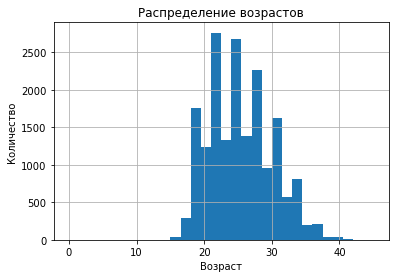

In [8]:
df['Age'].hist(range=(0,45), bins=30)
plt.title('Распределение возрастов')
plt.xlabel('Возраст')
plt.ylabel('Количество')
plt.show()

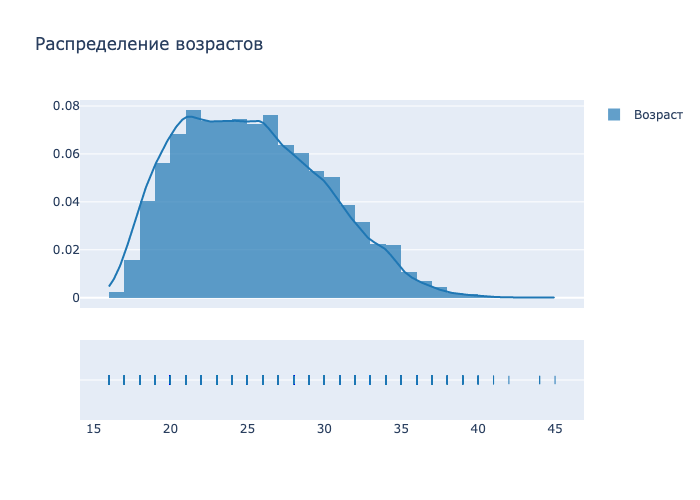

In [9]:


np.random.seed(1)

x = df['Age']
hist_data = [x]
group_labels = ['Возраст']

fig = ff.create_distplot(hist_data, group_labels)
fig.update_layout(title_text='Распределение возрастов')
fig.show()

5. Найдите колонку, показывающую, является ли футболист левой или правшой
6. Визуализируйте соотношенеие между левшами и правшами (считаем, что признак "левша"/"правша" определяет предпочтительную ногу для ударов

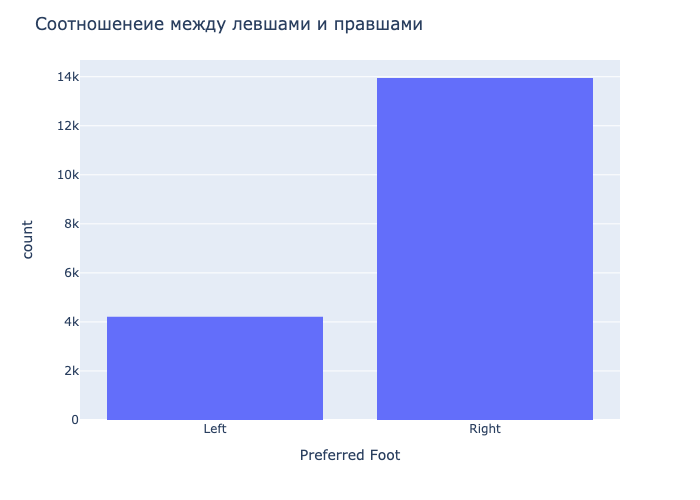

In [10]:
fig = px.histogram(df, x="Preferred Foot")
fig.update_layout(title_text='Соотношенеие между левшами и правшами')
fig.show()

7. Визуализируйте Международный Рейтинг футболистов (International Reputation)
8. Ассоциирован ли он с национальностью? С футбольным клубом? 

![Игроки](Players.png "Title")

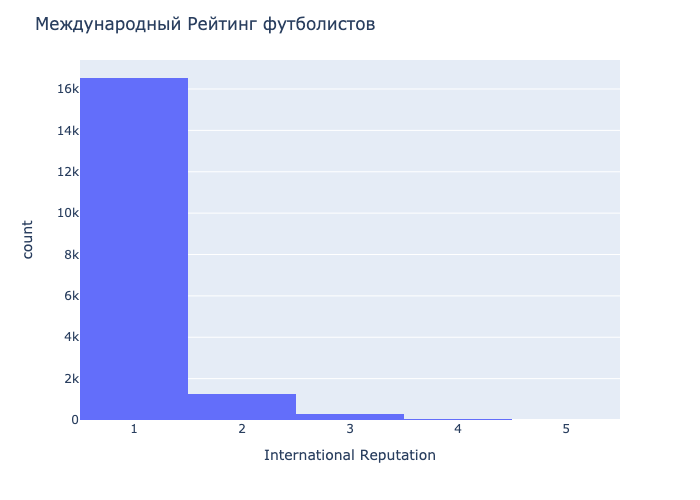

In [11]:
fig = px.histogram(df, x="International Reputation")
fig.update_layout(title_text='Международный Рейтинг футболистов')
fig.show()

In [12]:
(df
 .pivot_table(index='Nationality', columns='International Reputation', values='Club', aggfunc='count')
 .sort_values([1,2,3,4,5], ascending = False))

International Reputation,1.0,2.0,3.0,4.0,5.0
Nationality,,,,,
England,1567.0,73.0,16.0,1.0,NaN
Germany,1065.0,104.0,17.0,8.0,1.0
Spain,932.0,94.0,36.0,9.0,NaN
Argentina,842.0,68.0,20.0,4.0,1.0
France,762.0,115.0,29.0,5.0,NaN
...,...,...,...,...,...
St Lucia,1.0,NaN,NaN,NaN,NaN
São Tomé & Príncipe,1.0,NaN,NaN,NaN,NaN
India,0.0,NaN,NaN,NaN,NaN


In [13]:
(df
 .pivot_table(index='Club', columns='International Reputation', values='ID', aggfunc='count')
 .sort_values([5], ascending = False))

International Reputation,1.0,2.0,3.0,4.0,5.0
Club,,,,,
FC Barcelona,14.0,5.0,8.0,4.0,2.0
FC Bayern München,9.0,6.0,5.0,8.0,1.0
Juventus,4.0,7.0,12.0,1.0,1.0
LA Galaxy,20.0,2.0,2.0,NaN,1.0
Paris Saint-Germain,11.0,8.0,5.0,5.0,1.0
...,...,...,...,...,...
Zagłębie Sosnowiec,25.0,NaN,NaN,NaN,NaN
Çaykur Rizespor,30.0,NaN,NaN,NaN,NaN
Örebro SK,27.0,NaN,NaN,NaN,NaN


In [14]:
df.groupby('International Reputation')['Club'].count().reset_index()

,International Reputation,Club
0,1.0,16305
1,2.0,1248
2,3.0,308
3,4.0,51
4,5.0,6


Футболистов с высоким Международным Рейтингом очень мало, относительно общего числа футболистов.

In [15]:
df45 = df[df['International Reputation'] > 3]

In [16]:
(df45
 .pivot_table(index='Nationality', columns='International Reputation', values='Club', aggfunc='count')
 .sort_values([4,5], ascending = False))

International Reputation,4.0,5.0
Nationality,,
Spain,9.0,NaN
Germany,8.0,1.0
Brazil,5.0,1.0
France,5.0,NaN
Argentina,4.0,1.0
Belgium,4.0,NaN
Italy,3.0,NaN
Chile,2.0,NaN
Croatia,2.0,NaN


In [17]:
(df45
 .pivot_table(index=['Club','Nationality'], columns='International Reputation', values='ID', aggfunc='count')
 )


International Reputation               4.0  5.0
Club                   Nationality             
Arsenal                Czech Republic  1.0  NaN
                       Germany         1.0  NaN
Atlético Madrid        France          1.0  NaN
                       Spain           1.0  NaN
Beşiktaş JK            Portugal        1.0  NaN
Borussia Dortmund      Germany         2.0  NaN
Chelsea                Belgium         1.0  NaN
                       Brazil          1.0  NaN
                       Spain           1.0  NaN
Chicago Fire           Germany         1.0  NaN
DC United              England         1.0  NaN
FC Barcelona           Argentina       NaN  1.0
                       Chile           1.0  NaN
                       Croatia         1.0  NaN
                       Spain           2.0  NaN
                       Uruguay         NaN  1.0
FC Bayern München      Austria         1.0  NaN
                       Colombia        1.0  NaN
                       France          1.0  NaN
                       Germany         3.0  1.0
                       Netherlands     1.0  NaN
                       Poland          1.0  NaN
FC Porto               Spain           1.0  NaN
Hebei China Fortune FC Argentina       1.0  NaN
Juventus               Italy           1.0  NaN
                       Portugal        NaN  1.0
LA Galaxy              Sweden          NaN  1.0
Manchester City        Argentina       1.0  NaN
                       Belgium         2.0  NaN
                       Spain           1.0  NaN
Manchester United      Chile           1.0  NaN
                       France          1.0  NaN
                       Spain           1.0  NaN
Milan                  Argentina       1.0  NaN
OGC Nice               Italy           1.0  NaN
Paris Saint-Germain    Argentina       1.0  NaN
                       Brazil          2.0  1.0
                       Italy           1.0  NaN
                       Uruguay         1.0  NaN
Real Madrid            Belgium         1.0  NaN
                       Brazil          1.0  NaN
                       Croatia         1.0  NaN
                       France          1.0  NaN
                       Germany         1.0  NaN
                       Spain           1.0  NaN
                       Wales           1.0  NaN
Shanghai SIPG FC       Brazil          1.0  NaN
Tottenham Hotspur      France          1.0  NaN
Vissel Kobe            Spain           1.0  NaN

In [18]:
len(df['Club'].unique())

652

Международный Рейтинг футболистов не ассоциирован с национальностью. 

Есть топовые клубы, в которых несколько высокорейтинговых футболистов, но футболистов с рейтингом 5 всего 6 среди почти 2 тысяч и в них нет явного преобладания какой-либо национальности. 

9. Есть ли зависимость между потенциалом (Potential) и Международным Рейтингом футболистов (International Reputation)? Визуализируте её
10. Влияет ли на потенциал игровая нога? Почему так может случиться? (картинка в тему)

![Коазуация или корреляция?](causuation.png "???")

Коэффициент корреляции равен: 0.26269370713482176


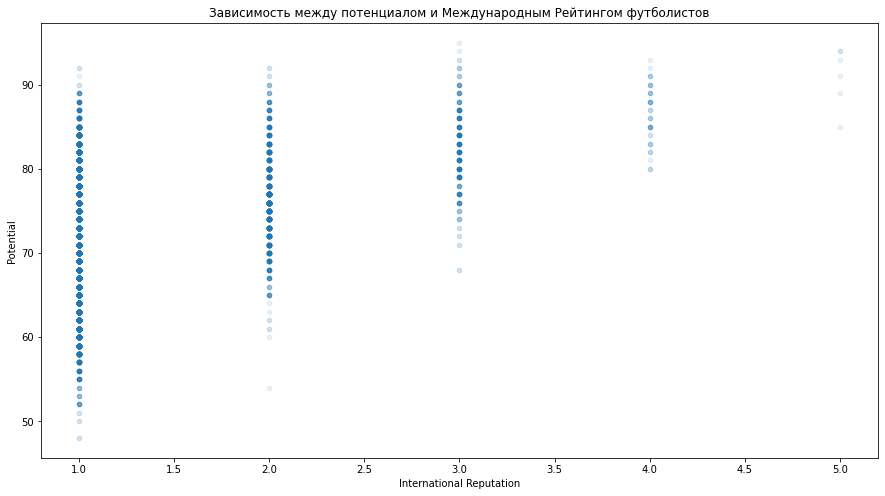

In [19]:
df.plot(x='International Reputation', y='Potential', kind='scatter', alpha=0.1, figsize=(15,8), title='Зависимость между потенциалом и Международным Рейтингом футболистов')
print('Коэффициент корреляции равен:', df['Strength'].corr(df['Stamina']))

Коэффициент корреляции этих двух показателей 0.26, это говорит о слабой зависимости.

In [20]:
(df
 .pivot_table(index='Potential', columns='Preferred Foot', values='ID', aggfunc='count')
 .sort_values(['Potential'], ascending = False))

Preferred Foot,Left,Right
Potential,,
95,NaN,1.0
94,2.0,1.0
93,NaN,4.0
92,4.0,5.0
91,1.0,11.0
90,6.0,15.0
89,13.0,20.0
88,11.0,37.0
87,20.0,41.0


По данным можно сказать, что самый высокий потенциал чаще всего у правшей, но правшей в мире больше(в мире всего 15% левшей), поэтому футболисты с правой игровой ногой чаще имеют высокий потенциал и игровая нога не влияет

Теперь пройдёмся по показателям игроков...

11. Есть ли зависимость между **выносливостью** игрока (Stamina) и его **силой** (Strength)? Какая? Точно ли это зависимость? 


Коэффициент корреляции равен: 0.26269370713482176


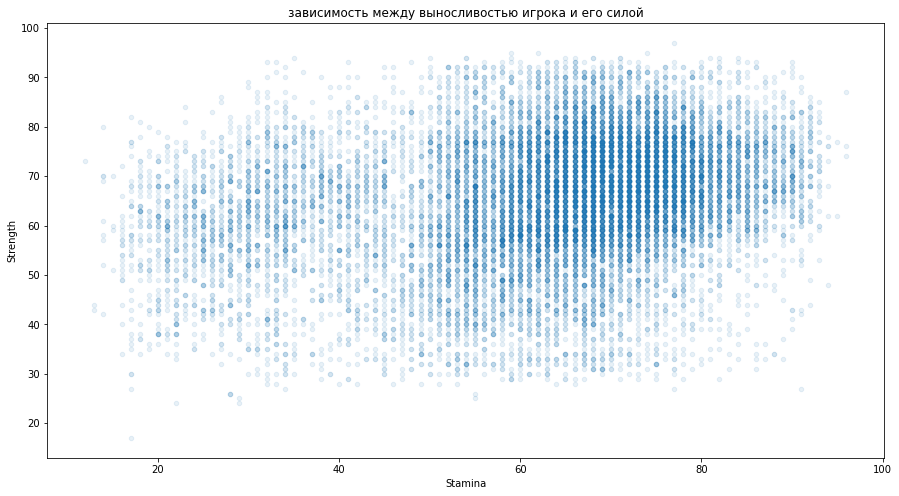

In [21]:
df.plot(x='Stamina', y='Strength', kind='scatter', alpha=0.1, figsize=(15,8), title='зависимость между выносливостью игрока и его силой')
print('Коэффициент корреляции равен:', df['Strength'].corr(df['Stamina']))

Коэффициент корреляции этих двух показателей  0.26, это говорит о слабой зависимости. 

12. Зависит ли **стоимость** игрока (Value) от его "**финтов**" (Skill Moves)?

In [22]:
df['Value'] = df['Value'].replace("€", "", regex=True)

In [23]:
def m_k(row):
        if 'M' in row:
            return float(row.replace("M", "")) * 1_000_000
        elif 'K' in row:
            return float(row.replace("K", "")) * 1_000


In [24]:
df['Value'] = df['Value'].apply(m_k)

In [25]:
df['Value']

0        110500000.0
1         77000000.0
2        118500000.0
3         72000000.0
4        102000000.0
            ...     
18202        60000.0
18203        60000.0
18204        60000.0
18205        60000.0
18206        60000.0
Name: Value, Length: 18207, dtype: float64

Коэффициент корреляции равен: 0.3172457704279949


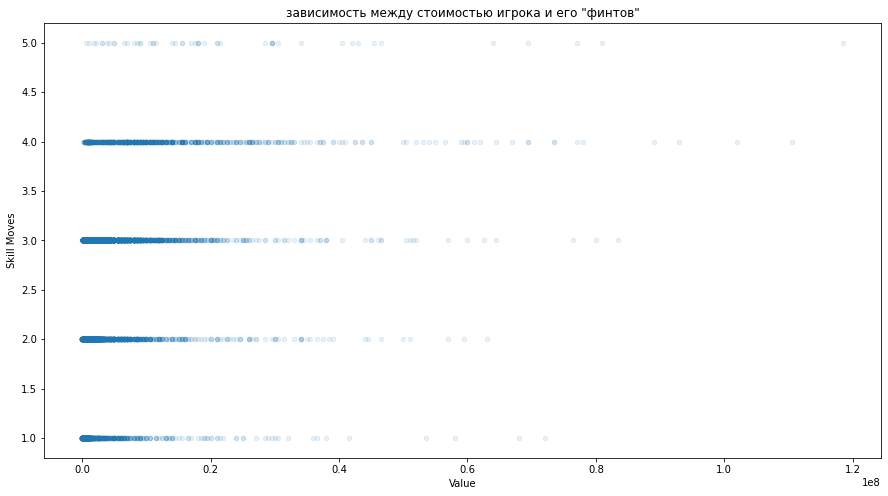

In [26]:
df.plot(x='Value', y='Skill Moves', kind='scatter', alpha=0.1, figsize=(15,8), title='зависимость между стоимостью игрока и его "финтов"' )
print('Коэффициент корреляции равен:', df['Value'].corr(df['Skill Moves']))

Коэффициент корреляции этих двух показателей 0.31, это говорит о слабой зависимости, поэтому стоимость игрока (Value) немного зависит от его "финтов"

13. Покажите распределения основных характеристик игроков: **рост**, **вес**, **возраст** по **позициям** (Position), сделайте выводы

In [27]:
df['Weight'] = df['Weight'].str.replace(r"[^\d\.]", "", regex=True).astype('float') #уберем lbs, чтобы привести к числовому

In [28]:
df['Age'] = df['Age'].dropna()
df['Weight'] = df['Weight'].dropna() 

In [29]:
group_labels = []
hist_data = []

In [30]:
me = [i for i in df['Position'].unique() if i is not np.nan]

In [31]:
for i in me:
    group_labels.append(i)
    qwe = df[df['Position']==i]
    hist_data.append(qwe['Age'])

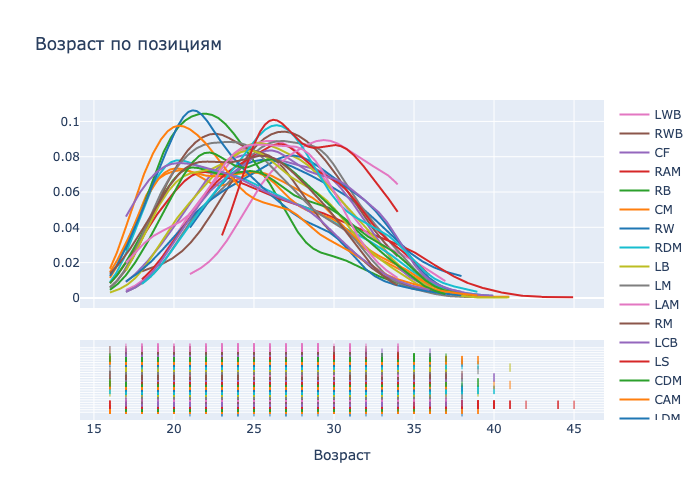

In [32]:
fig_age=ff.create_distplot(hist_data, group_labels, show_hist=False)
fig_age.update_layout(title_text='Возраст по позициям')
fig_age.layout.xaxis.update({'title': 'Возраст'})
fig_age.show()

Возраст всех футболистов по позициям в основном от 20 до 27 лет. Самые молодые центральные полузащитники(20 лет), а самые старшие правые атакующие полузащитники. У остальных позиций чаще всего самый частый возраст 25. 

In [33]:
df['Weight'] = df['Weight']*0.453592 #переведем вес в килограммы

In [34]:
group_labels2 = []
hist_data2 = []

In [35]:
for i in me:
    group_labels2.append(i)
    qwe = df[df['Position']==i]
    hist_data2.append(qwe['Weight'])

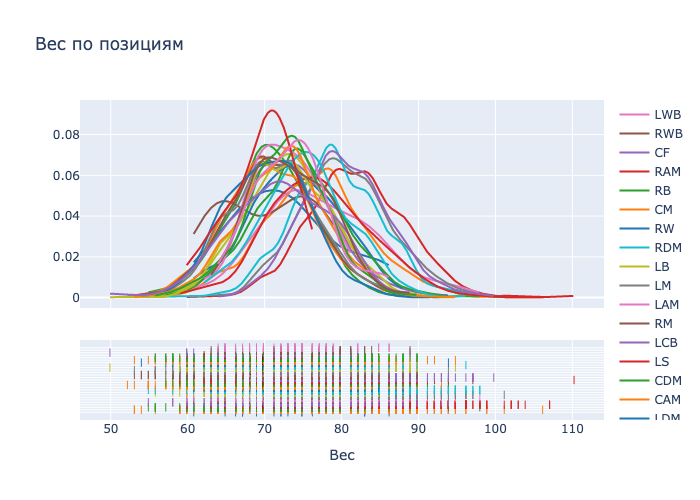

In [36]:
fig_weight = ff.create_distplot(hist_data2, group_labels2, show_hist=False)
fig_weight.update_layout(title_text='Вес по позициям')
fig_weight.layout.xaxis.update({'title': 'Вес'})
fig_weight.show()

Вес футболистов в основном от 70 до 80. Больше всего с весом 70 кг. Самые тяжелые - центральные защитники и вратари, их вес чаще всего 78 кг. 

In [37]:
df['Height']=df['Height'].str.replace("'", '.')
df['Height'] = df['Height'].astype('float64') #приведем значения роста к числовым 

In [38]:
group_labels3 = []
hist_data3 = []

In [39]:
for i in me:
    group_labels3.append(i)
    qwe = df[df['Position']==i]
    hist_data3.append(qwe['Height'])

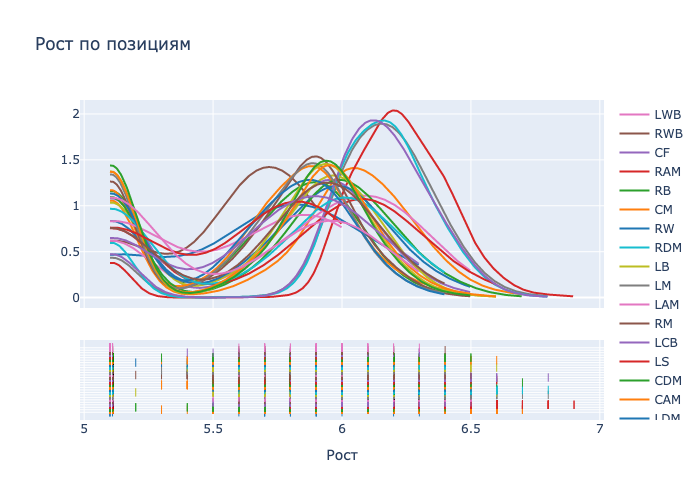

In [40]:
fig_height=ff.create_distplot(hist_data3, group_labels3, show_hist=False)
fig_height.update_layout(title_text='Рост по позициям')
fig_height.layout.xaxis.update({'title': 'Рост'})
fig_height.show()

В основном все футболисты ростом 5'8,5'9(176 - 179 см), но вратари существенно выше остальных игроков, их рост чаще всего 6'2(188 см). Центральные защитники тоже выделяются своим ростом. 

14. Есть ли зависимость **скорости** (SprintSpeed) от **веса** и **роста**? От **национальности**?

Коэффициент корреляции равен: -0.41093630221159816


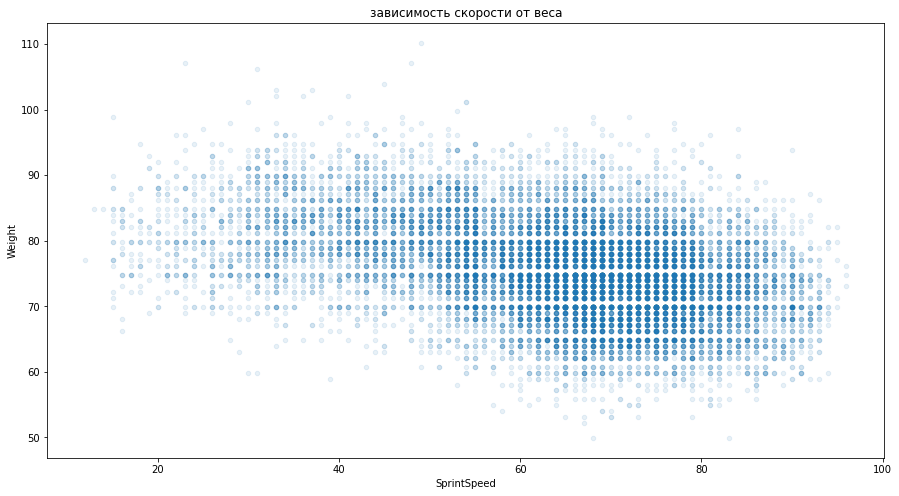

In [41]:
df.plot(x='SprintSpeed', y='Weight', kind='scatter', alpha=0.1, figsize=(15,8), title='зависимость скорости от веса')
print('Коэффициент корреляции равен:', df['SprintSpeed'].corr(df['Weight']))

Коэффициент корреляции этих двух показателей -0.41, это говорит о средней зависимости. Если увеличится один параметр, то скорее всего уменьшится другой. 

Коэффициент корреляции равен: -0.3262435203809282


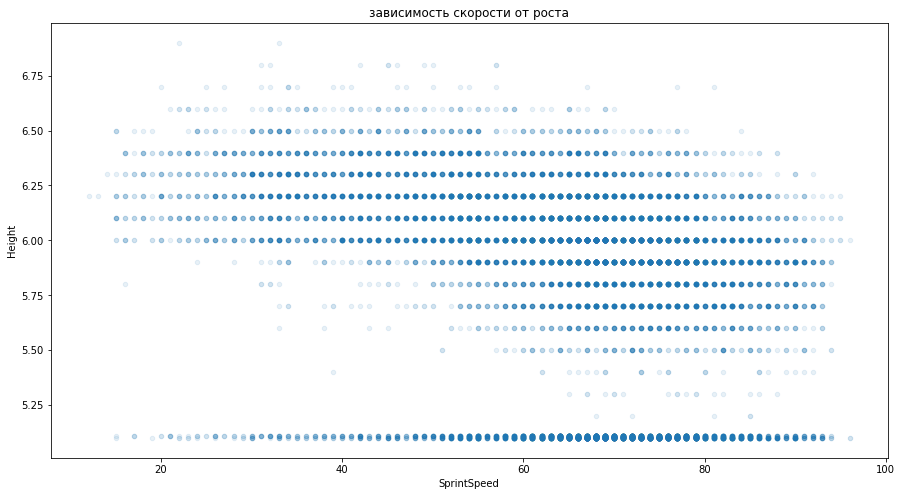

In [42]:
df.plot(x='SprintSpeed', y='Height', kind='scatter', alpha=0.1, figsize=(15,8), title='зависимость скорости от роста')
print('Коэффициент корреляции равен:', df['SprintSpeed'].corr(df['Height']))

Коэффициент корреляции этих двух показателей -0.32, это говорит о слабой зависимости. 

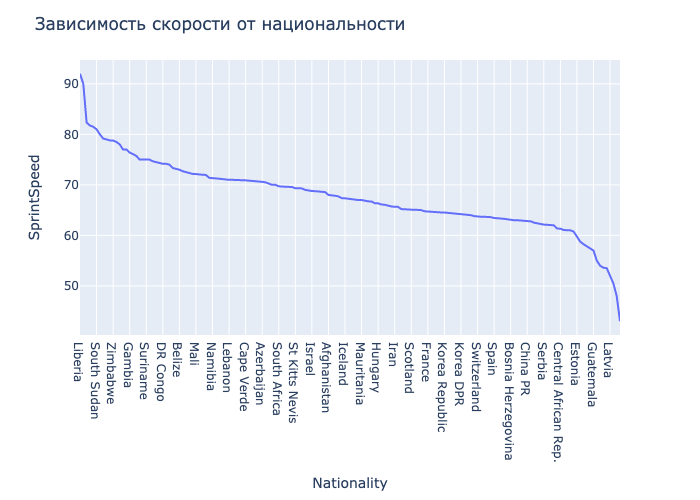

In [43]:
rar=(df
 .pivot_table(index='Nationality', values='SprintSpeed', aggfunc='mean')
 .sort_values('SprintSpeed', ascending = False)
 .reset_index()
 )
fig = px.line(rar, x='Nationality', y="SprintSpeed")
fig.update_layout(title_text='Зависимость скорости от национальности')
fig.show()

In [44]:
len(df[df['Nationality'] =='Qatar'])

1

In [45]:
len(df[df['Nationality'] =='Liberia'])

1

Средняя скорость всех национальностей примерно одинаковая, футболисты из Либерии и Катара выделяются, но их количество слишком маленькое, поэтому делать вывод о зависимости скорости от национальности нельзя. Зависимость скороси от национальности отсутствует. 

15. Под какими номерами чаще всего играют нападающие? Визуализируйте частотность

In [46]:
f = df[(df['Position'] == 'RF') | (df['Position'] == 'LF')]

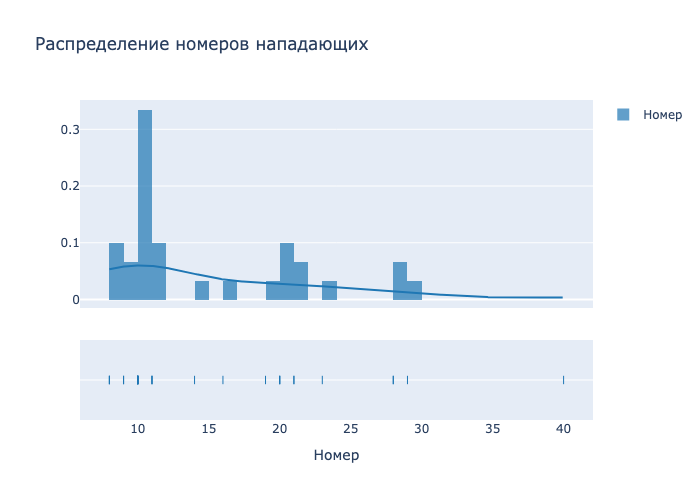

In [47]:
np.random.seed(1)
x = f['Jersey Number']
hist_data = [x]
group_labels = ['Номер']

fig = ff.create_distplot(hist_data, group_labels)
fig.update_layout(title_text='Распределение номеров нападающих')
fig.layout.xaxis.update({'title': 'Номер'})
fig.show()

Чаще всего нападающие играют под номером 10

16. Есть ли за зависимость **силы удара** (ShotPower) от **ведущей ноги**? от **агрессивности** (Aggression)? 


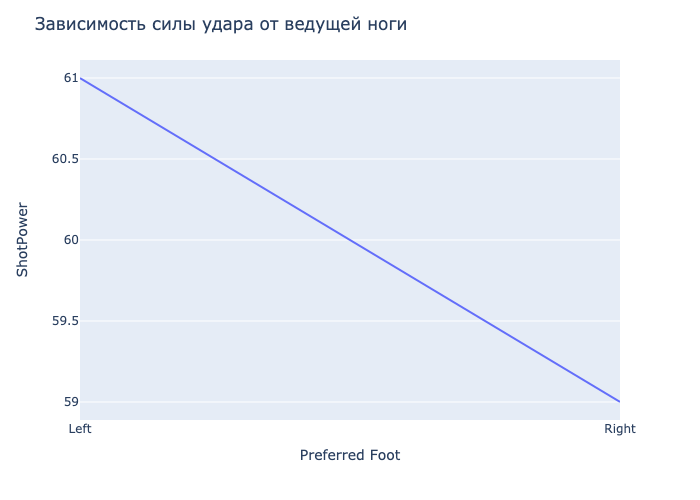

In [48]:
dar=(df
 .pivot_table(index='Preferred Foot', values='ShotPower', aggfunc='median')
 .sort_values('ShotPower', ascending = False)
 .reset_index()
 )
fig = px.line(dar, x='Preferred Foot', y="ShotPower")
fig.update_layout(title_text='Зависимость силы удара от ведущей ноги')
fig.show()

Медианное значение силы удара правой и левой ноги отличаются не существенно. Сила удара левой ноги выше на 2. Зависимости нет. 

Коэффициент корреляции равен: 0.49138588639544023


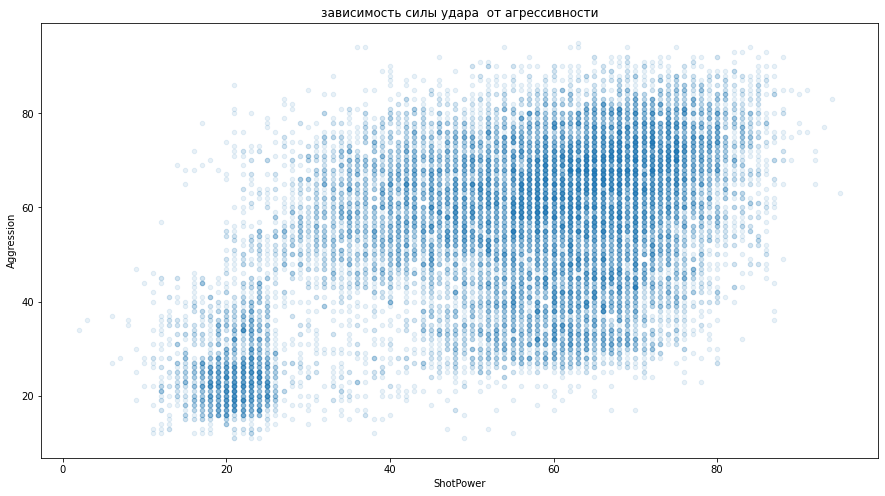

In [49]:
df.plot(x='ShotPower', y='Aggression', kind='scatter', alpha=0.1, figsize=(15,8), title='зависимость силы удара  от агрессивности' )
print('Коэффициент корреляции равен:', df['ShotPower'].corr(df['Aggression']))

Коэффициент корреляции этих двух показателей 0.49, это говорит о средней зависимости. Чем сильнее удар, тем агрессивнее футболист.  

17. Найдите суммарную стоимость игроков Value в каждом клубе
18. Визуализируйте соотношение сумарной стоимости топ 10 клубов

In [50]:
val=(df
 .pivot_table(index='Club', values='Value', aggfunc='sum')
 .sort_values('Value', ascending = False)
 .reset_index()
 )
val

,Club,Value
0,Real Madrid,874425000.0
1,FC Barcelona,852600000.0
2,Manchester City,786555000.0
3,Juventus,704475000.0
4,FC Bayern München,679025000.0
...,...,...
646,Sligo Rovers,3295000.0
647,Bohemian FC,3195000.0
648,Derry City,2795000.0
649,Limerick FC,2040000.0


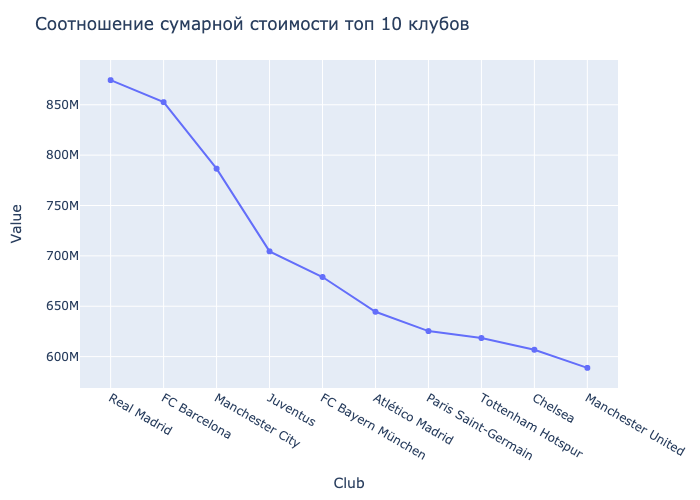

In [51]:
fig = px.line(val.head(10), x='Club', y="Value", markers=True)
fig.update_layout(title_text='Соотношение сумарной стоимости топ 10 клубов')
fig.show()

19. Есть ли зависимость между продолжительностью контракта игрока и его стоимостью? 

In [52]:
df['Joined'] = pd.to_datetime(
    df['Joined'], format='%b %d, %Y'
).dt.year

In [53]:
df['Joined'] = df['Joined'].dropna().astype('int')

In [54]:
def date(row):
    if row == '2021':
        return row
    elif row == '2022':
        return row
    elif row == '2020':
        return row
    elif row == '2023':
        return row
    elif row == '2019':
        return row
    elif row == '2024':
        return row
    elif row == '2025':
        return row
    elif row == '2026':
        return row
    elif row == '2018':
        return row
    else:
        return pd.to_datetime(row, format='%b %d, %Y').year

In [55]:
df['Contract Valid Until'] = df['Contract Valid Until'].apply(date)

In [56]:
df['Contract Valid Until'] = df['Contract Valid Until'].dropna().astype('float')

In [57]:
df['long'] = df['Contract Valid Until'] - df['Joined']

Коэффициент корреляции равен: 0.2342566581506106


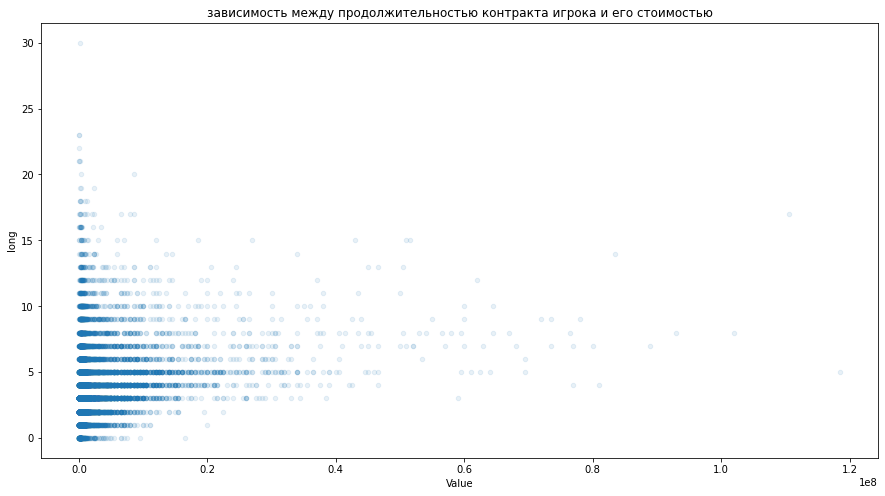

In [58]:
df.plot(x='Value', y='long', kind='scatter', alpha=0.1, figsize=(15,8), title='зависимость между продолжительностью контракта игрока и его стоимостью' )
print('Коэффициент корреляции равен:', df['Value'].corr(df['long']))

Коэффициент корреляции этих двух показателей 0.23, это говорит о слабой зависимости.

20. В какой год будет больше всего свободных игроков на рынке (исходя из этих данных)? Визуализируйте зависимость

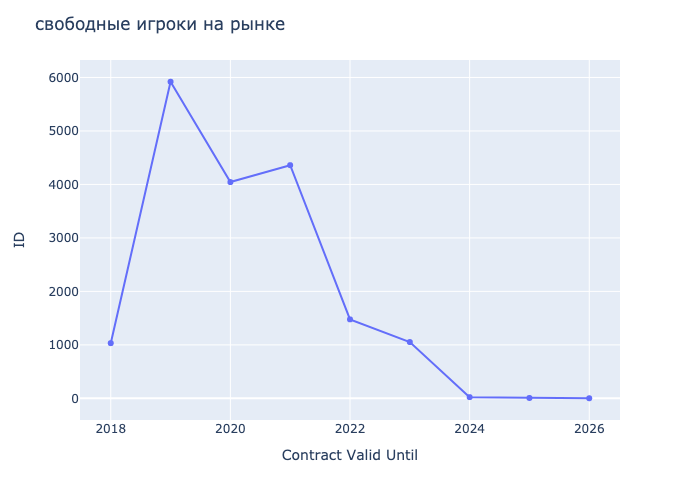

In [59]:
unt=(df
 .pivot_table(index='Contract Valid Until', values='ID', aggfunc='count')
 .sort_values('Contract Valid Until', ascending = False)
 .reset_index()
 )
fig = px.line(unt, x='Contract Valid Until', y="ID", markers=True)
fig.update_layout(title_text='свободные игроки на рынке ')
fig.show()

В 2019 году будет больше всего свободных игроков на рынке

21. Есть ли зависмость **потенциала** (Potential) игрока от **возраста**?
22. Всегда ли молодые игроки обладают большим потенциалом?

Коэффициент корреляции равен: -0.25331210741095567


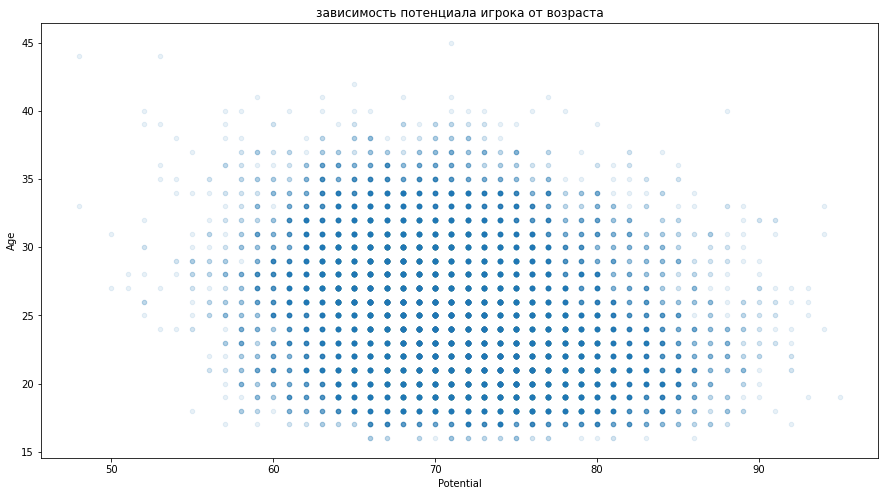

In [60]:
df.plot(x='Potential', y='Age', kind='scatter', alpha=0.1, figsize=(15,8), title='зависимость потенциала игрока от возраста' )
print('Коэффициент корреляции равен:', df['Potential'].corr(df['Age']))

Коэффициент корреляции этих двух показателей 0.25, это говорит о слабой зависимости.

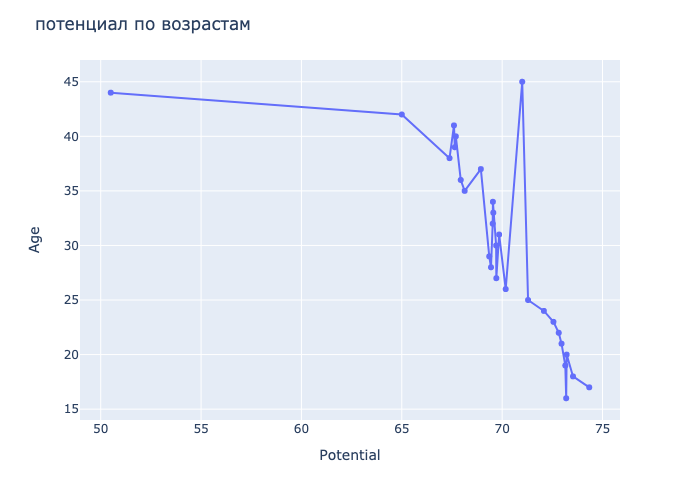

In [61]:
pot=(df
 .pivot_table(index='Age', values='Potential', aggfunc='mean')
 .sort_values('Potential', ascending = False)
 .reset_index()
 )
fig = px.line(pot, x='Potential', y="Age", markers=True)
fig.update_layout(title_text='потенциал по возрастам')
fig.show()

Не только молодые игроки имеют самый большой потенциал. Самые перспективные футболисты, конечно, в возрасте 16-25, но футболисты в возрасте 45 лет также имеют достаточно высокий потенциал

23. Есть ли зависимость **рейтинга** игрока (Overall) от **возраста**?
24. Когда у игроков "пик" карьеры?
25. Игроков какого возраста больше всего с рейтингом 90+?

In [62]:
print('Коэффициент корреляции равен:', df['Overall'].corr(df['Age']))

Коэффициент корреляции равен: 0.45234952145633556


Коэффициент корреляции этих двух показателей 0.25, это говорит о средней зависимости. Чем выше рейтинг, тем футболист старше. 

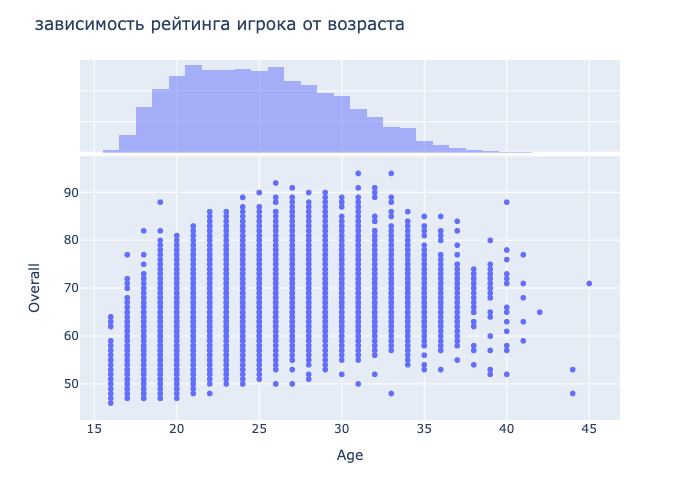

In [63]:
fig = px.scatter(df, x="Age", y="Overall", marginal_x="histogram")
fig.update_layout(title_text='зависимость рейтинга игрока от возраста')
fig.show()

Пик карьеры у футболистов в возрасте 21-26

In [64]:
overall90 = df[df['Overall']>=90]

In [65]:
(overall90
 .pivot_table(index='Age', values='Overall', aggfunc='count')
 .sort_values('Overall', ascending = False)
 .reset_index()
 )

,Age,Overall
0,32,4
1,27,3
2,31,2
3,25,1
4,26,1
5,28,1
6,29,1
7,33,1


Игроков с рейтингом 90+ больше всего в возрасте 32 года. 

26. Насколько средняя зарплата (Wage) игроков с рейтингом (Overall) 90+ больше средней зарплаты с рейтингом [80 - 90]? Визуализируйте возможную зависимость

In [66]:
df['Wage'].unique() # все зарплаты в тысячах, можем убрать

array(['€565K', '€405K', '€290K', '€260K', '€355K', '€340K', '€420K',
       '€455K', '€380K', '€94K', '€205K', '€125K', '€285K', '€225K',
       '€145K', '€240K', '€315K', '€200K', '€130K', '€300K', '€215K',
       '€100K', '€255K', '€165K', '€265K', '€160K', '€150K', '€245K',
       '€110K', '€77K', '€115K', '€210K', '€195K', '€230K', '€250K',
       '€135K', '€155K', '€180K', '€175K', '€190K', '€185K', '€21K',
       '€82K', '€73K', '€92K', '€88K', '€96K', '€170K', '€66K', '€235K',
       '€28K', '€105K', '€38K', '€81K', '€57K', '€15K', '€63K', '€22K',
       '€84K', '€120K', '€90K', '€72K', '€93K', '€45K', '€74K', '€51K',
       '€42K', '€31K', '€75K', '€25K', '€140K', '€41K', '€78K', '€53K',
       '€95K', '€80K', '€43K', '€60K', '€85K', '€64K', '€67K', '€18K',
       '€70K', '€91K', '€20K', '€49K', '€87K', '€86K', '€26K', '€29K',
       '€55K', '€35K', '€33K', '€56K', '€30K', '€11K', '€59K', '€23K',
       '€46K', '€39K', '€32K', '€36K', '€98K', '€54K', '€68K', '€58K',
       '€2

In [67]:
df['Wage'] = df['Wage'].str.replace("[^\d\.]", "", regex=True).astype('int') 

In [68]:
overall90 = df[df['Overall']>=90]

In [69]:
a=overall90['Wage'].mean()

In [70]:
overall80 = df[(df['Overall']<=90) & (df['Overall']>=80)]

In [71]:
b=overall80['Wage'].mean()

In [72]:
print('Средняя зарплата игроков с рейтингом 90+ больше средней зарплаты с рейтингом [80 - 90] на',round((a/b-1)*100),'%'  )

Средняя зарплата игроков с рейтингом 90+ больше средней зарплаты с рейтингом [80 - 90] на 287 %


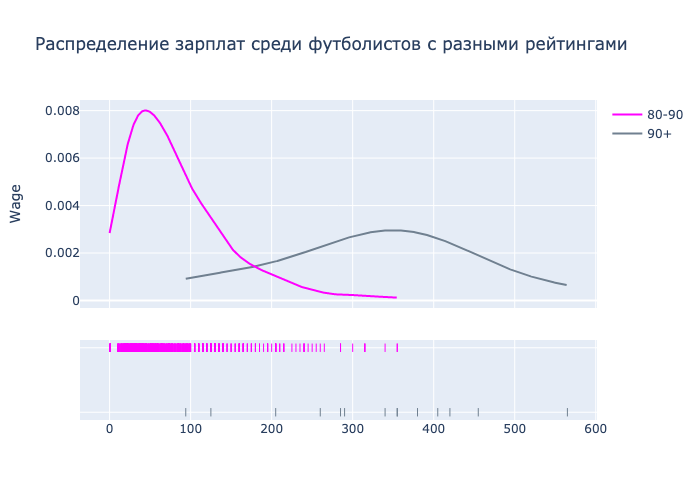

In [73]:
group_labels = ['90+', '80-90']

colors = ['slategray', 'magenta']
hist_data = [overall90['Wage'], overall80['Wage']]

fig = ff.create_distplot(hist_data, group_labels, show_hist=False, colors=colors)


# Add title
fig.update_layout(title_text='Распределение зарплат среди футболистов с разными рейтингами')
fig.layout.yaxis.update({'title': 'Wage'})
fig.show()